# Resume Ranking using NLP and Machine Learning

# Batch - 9B

# Usharama College of Engineering and Technology

**Workflow**
1. Creating word embedding using Genism , Word2Vec
2. Preprocessing 
3. Removing common words that are not required
4. Creating phrases of words that frequently occur togther (bigrams)
5. Building word2vec model
6. Extracting resumes (using PyPDF) and converting to string
7. Building candidate profile using model.most_similar(skills), where skills is an array of required skills
8. Creating a matcher using Spacy to match the wods in resume to most_similar(skills)
9. Printing and visualizing the candidate profile

In [1]:
pip install gensim==3.4.0

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\maddy\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install spacy==2.3.5 --user

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\maddy\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz


  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047113 sha256=961d434443b26e145e35aa952e741a917cc947e7b480329a95e7e4ff6b736404
  Stored in directory: c:\users\maddy\appdata\local\pip\cache\wheels\b7\0d\f0\7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\maddy\Anaconda3\python.exe -m pip install --upgrade pip' command.


### Creating word embedding 

In [4]:
from gensim.models import Word2Vec
import string
import re
from nltk.corpus import stopwords
with open(r'C:\Users\maddy\Documents\ml-projects-urcet\resume-ranking\Resume-Scoring-using-NLP\skills.txt',encoding="utf8") as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]

C:\Users\maddy\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
content[1]

'Data science is a "concept to unify statistics, data analysis, machine learning and their related methods" in order to "understand and analyze actual phenomena" with data. It employs techniques and theories drawn from many fields within the context of mathematics, statistics, information science, and computer science. Turing award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.'

In [6]:
from nltk.tokenize import word_tokenize
import gensim
from gensim.models.phrases import Phraser, Phrases

**Preprocessing**

In [7]:
x=[]
for line in content:
    tokens=word_tokenize(line)
    tok=[w.lower() for w in tokens]
    table=str.maketrans('','',string.punctuation)
    strpp=[w.translate(table) for w in tok]
    words=[word for word in strpp if word.isalpha()]
    stop_words=set(stopwords.words('english'))
    words=[w for w in words if not w in stop_words]
    x.append(words)

In [8]:
texts=x

In [9]:
print(texts[6])

['william', 'cleveland', 'introduced', 'data', 'science', 'independent', 'discipline', 'extending', 'field', 'statistics', 'incorporate', 'advances', 'computing', 'data', 'article', 'data', 'science', 'action', 'plan', 'expanding', 'technical', 'areas', 'field', 'statistics', 'published', 'volume', 'april', 'edition', 'international', 'statistical', 'review', 'revue', 'internationale', 'de', 'statistique', 'report', 'cleveland', 'establishes', 'six', 'technical', 'areas', 'believed', 'encompass', 'field', 'data', 'science', 'multidisciplinary', 'investigations', 'models', 'methods', 'data', 'computing', 'data', 'pedagogy', 'tool', 'evaluation', 'theory']


**Removing commonly occuring words that are not useful**

In [10]:
with open('common.txt') as f:
    content2 = f.read()
ntexts=[]
l=len(texts)
for j in range(l):
    s=texts[j]
    res = [i for i in s if i not in content2]
    ntexts.append(res)
print(texts[6])

    

['william', 'cleveland', 'introduced', 'data', 'science', 'independent', 'discipline', 'extending', 'field', 'statistics', 'incorporate', 'advances', 'computing', 'data', 'article', 'data', 'science', 'action', 'plan', 'expanding', 'technical', 'areas', 'field', 'statistics', 'published', 'volume', 'april', 'edition', 'international', 'statistical', 'review', 'revue', 'internationale', 'de', 'statistique', 'report', 'cleveland', 'establishes', 'six', 'technical', 'areas', 'believed', 'encompass', 'field', 'data', 'science', 'multidisciplinary', 'investigations', 'models', 'methods', 'data', 'computing', 'data', 'pedagogy', 'tool', 'evaluation', 'theory']


In [11]:
print(ntexts[6])

['william', 'cleveland', 'introduced', 'data', 'science', 'independent', 'discipline', 'extending', 'field', 'statistics', 'incorporate', 'advances', 'computing', 'data', 'article', 'data', 'science', 'action', 'plan', 'expanding', 'technical', 'areas', 'field', 'statistics', 'published', 'volume', 'april', 'edition', 'international', 'statistical', 'review', 'revue', 'internationale', 'de', 'statistique', 'report', 'cleveland', 'establishes', 'six', 'technical', 'areas', 'believed', 'encompass', 'field', 'data', 'science', 'multidisciplinary', 'investigations', 'models', 'methods', 'data', 'computing', 'data', 'pedagogy', 'tool', 'evaluation', 'theory']


In [12]:
print(len(ntexts))
texts=ntexts

316


In [13]:
content=texts

**Creating bigrams**

In [14]:
common_terms = ["of", "with", "without", "and", "or", "the", "a"]
x=ntexts
# Create the relevant phrases from the list of sentences:
phrases = Phrases(x, common_terms=common_terms)
# The Phraser object is used from now on to transform sentences
bigram = Phraser(phrases)
# Applying the Phraser to transform our sentences
all_sentences = list(bigram[x])
model=gensim.models.Word2Vec(all_sentences,size=5000,min_count=2,workers=4,window=4)
model.save("final.model")
wrds=list(model.wv.vocab)
print(len(wrds))

1240


**Testing**

In [15]:
z=model.wv.most_similar("machine_learning")

In [16]:
print(z)

[('software', 0.12770713865756989), ('data_science', 0.11758071929216385), ('data', 0.11278633028268814), ('deep', 0.10879992693662643), ('learning', 0.10805635899305344), ('many', 0.10781163722276688), ('may', 0.1067565381526947), ('using', 0.10606149584054947), ('deep_neural', 0.10451511293649673), ('deep_learning', 0.10236132144927979)]


### Resume Parsing

In [17]:
import PyPDF2
import os
import collections
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

**Reading Resumes from folder**

In [18]:
mypath=r'C:\Users\maddy\Documents\ml-projects-urcet\resume-ranking\Resume-Scoring-using-NLP\Resumes'
#Path for the files
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]


**Function to words from resume**

In [19]:
import collections
'''def pdfextract(file):
    pdf_file = open(file, 'rb')
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    number_of_pages = read_pdf.getNumPages()
    c = collections.Counter(range(number_of_pages))
    for i in c:
        #page
        page = read_pdf.getPage(i)
        page_content = page.extractText()
    return (page_content.encode('utf-8'))'''

def pdfextract(file):
    dummy=''
    pdffile=open(file,'rb')
    pdfReader=PyPDF2.PdfFileReader(pdffile)
    count=(pdfReader.numPages)
    for i in range(count):
        pageObj=pdfReader.getPage(i)
        dummy+=(pageObj.extractText())
    return(dummy)

In [20]:
sim_words=[k[0] for k in model.wv.most_similar("machine_learning")]

In [21]:
def create_bigram(words):
    common_terms = ["of", "with", "without", "and", "or", "the", "a"]
    x=words.split()
# Create the relevant phrases from the list of sentences:
    phrases = Phrases(x, common_terms=common_terms)
# The Phraser object is used from now on to transform sentences
    bigram = Phraser(phrases)
# Applying the Phraser to transform our sentences is simply
    all_sentences = list(bigram[x])
    
    

**Function to build candidate profile**

In [22]:
def create_profile(file):
    model=Word2Vec.load("final.model")
    text = str(pdfextract(file))
    text = text.replace("\\n", "")
    text = text.lower()
    #print(text)
    #text=create_bigram(text)
    #print(text)
    #below is the csv where we have all the keywords, you can customize your own
    #keyword_dictionary = pd.read_csv(r'C:\Users\dell\Desktop\New folder\ML_CS\NLP\technical_skills.csv')
    stats = [nlp(text[0]) for text in model.wv.most_similar("statistics")]
    NLP = [nlp(text[0]) for text in model.wv.most_similar("language")]
    ML = [nlp(text[0]) for text in model.wv.most_similar("machine_learning")]
    DL = [nlp(text[0]) for text in model.wv.most_similar("deep")]
    #R = [nlp(text) for text in keyword_dictionary['R Language'].dropna(axis = 0)]
    python = [nlp(text[0]) for text in model.wv.most_similar("python")]
    Data_Engineering = [nlp(text[0]) for text in model.wv.most_similar("data")]
    print("*******************************************")
    #print(stats_words,NLP_words)
    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats)
    matcher.add('NLP', None, *NLP)
    matcher.add('ML', None, *ML)
    matcher.add('DL', None, *DL)
    matcher.add('Python', None, *python)
    matcher.add('DE', None, *Data_Engineering)
    doc = nlp(text)
    
    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode I
        span = doc[start : end]               # get the matched slice of the doc
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    print("KEYWORDS")
    print(keywords)
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    print("********************DF********************")
    print(df)
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
    
       
    name = filename.split('_')
    print(name)
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)
    print("******************DATAF**************")
    print(dataf)

    return(dataf)

**Code to execute the above functions**

In [23]:
#Code to execute the above functions 
final_db=pd.DataFrame()
i=0
while i < len(onlyfiles):
    file=onlyfiles[i]
    dat=create_profile(file)

    final_db=final_db.append(dat)
    i+=1
    #print(final_db)

*******************************************
KEYWORDS
ML may (3)
DE may (3)
DL may (3)
Python may (3)
Stats programming (1)
DE design (1)
DE systems (1)
Python systems (1)
ML software (1)
NLP software (1)
Stats software (1)
DE software (1)
DL software (1)
Python software (1)
ML data (3)
NLP data (3)
Stats data (3)
DL data (3)
Python data (3)
********************DF********************
            Keywords_List
0              ML may (3)
1              DE may (3)
2              DL may (3)
3          Python may (3)
4   Stats programming (1)
5           DE design (1)
6          DE systems (1)
7      Python systems (1)
8         ML software (1)
9        NLP software (1)
10     Stats software (1)
11        DE software (1)
12        DL software (1)
13    Python software (1)
14            ML data (3)
15           NLP data (3)
16         Stats data (3)
17            DL data (3)
18        Python data (3)
['AmanSharma']
******************DATAF**************
   Candidate Name Subject       Keyword C

*******************************************
KEYWORDS
ML using (2)
NLP using (2)
Stats using (2)
DL using (2)
Python using (2)
ML learning (1)
NLP learning (1)
Stats learning (1)
Python learning (1)
Stats programming (2)
Python java (2)
DE systems (1)
Python systems (1)
********************DF********************
            Keywords_List
0            ML using (2)
1           NLP using (2)
2         Stats using (2)
3            DL using (2)
4        Python using (2)
5         ML learning (1)
6        NLP learning (1)
7      Stats learning (1)
8     Python learning (1)
9   Stats programming (2)
10        Python java (2)
11         DE systems (1)
12     Python systems (1)
['poorna']
******************DATAF**************
   Candidate Name Subject       Keyword Count
0          poorna      ML        using      2
1          poorna     NLP        using      2
2          poorna   Stats        using      2
3          poorna      DL        using      2
4          poorna  Python        using      

**Counting words under each category and building the candidate profile**

In [24]:
#Code to count words under each category and visualize it through MAtplotlib
final_db2 = final_db['Keyword'].groupby([final_db['Candidate Name'], final_db['Subject']]).count().unstack()
final_db2.reset_index(inplace = True)
final_db2.fillna(0,inplace=True)
candidate_data = final_db2.iloc[:,1:]
candidate_data.index = final_db2['Candidate Name']
#the candidate profile in a csv format
cand=candidate_data.to_csv('candidate_profile.csv')
cand_profile=pd.read_csv('candidate_profile.csv')
cand_profile

,Candidate Name,DE,DL,ML,NLP,Python,Stats
0,amansharma,4.0,3.0,3.0,2.0,4.0,3.0
1,chandler,2.0,3.0,4.0,3.0,6.0,3.0
2,meghnalohani,4.0,4.0,5.0,4.0,7.0,4.0
3,phoebe buffay,3.0,3.0,5.0,3.0,6.0,3.0
4,poorna,1.0,1.0,2.0,2.0,4.0,3.0
5,prasanna,1.0,2.0,2.0,3.0,5.0,3.0
6,vaishali bijoy,2.0,3.0,4.0,3.0,6.0,3.0
7,yamini,0.0,3.0,2.0,3.0,3.0,3.0


**Visualizing by matplotlib**

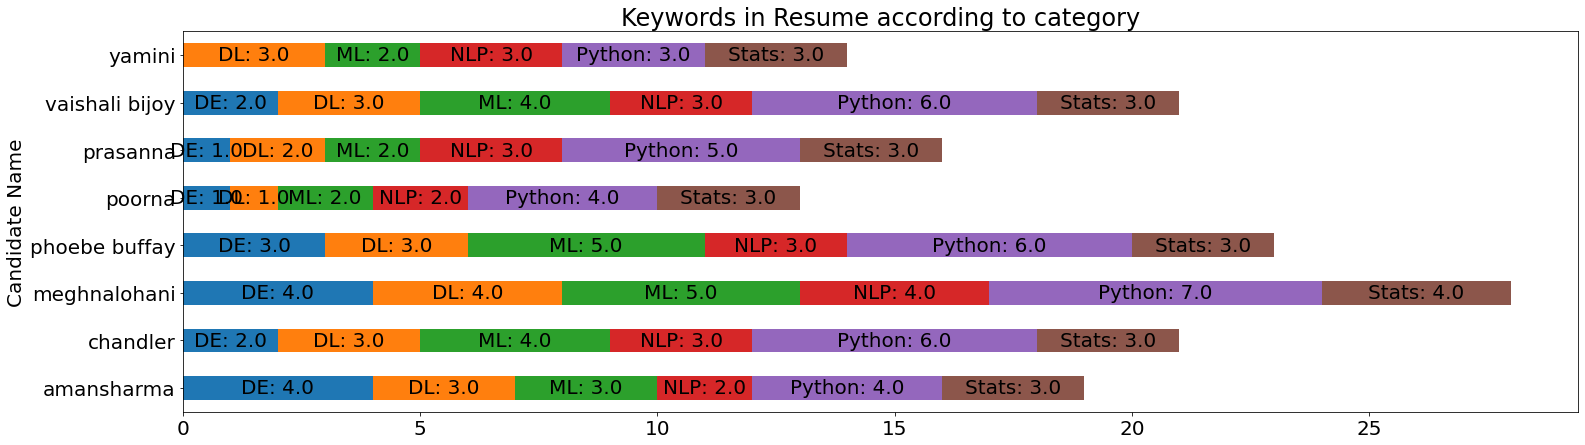

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20})
ax = candidate_data.plot.barh(title="Keywords in Resume according to category", legend=False, figsize=(25,7), stacked=True)
skills = []
for j in candidate_data.columns:
    for i in candidate_data.index:
        skill = str(j)+": " + str(candidate_data.loc[i][j])
        skills.append(skill)
patches = ax.patches
for skill, rect in zip(skills, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., skill, ha='center', va='center')
plt.show()

# References

1. https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
2. https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/
3. https://app.sketchengine.eu/
